# Statistical Parameter Estimation 2024
## Exercise 1

Author: Alex Karonen

Let us consider a simple exponential decay
$$y(t) = a ~ exp(−bt) + \epsilon(t).$$

Let the data be
$$ y(t) = (0.3573, 0.3618, 0.1920, 0.1585, 0.1041, 0.1100, 0.0560, 0.0291, 0.0252, 0.0249, 0.04160)^T,$$

$$t = (0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)^T,$$ 

$$ε(t) ∼ N (0, \sigma^2), \text{with} ~ \sigma = 0.02.$$

Original simulation values are a = 0.4 and b = 3. We denote $$\theta := (a, b)^T$$

1. Likelihood density
- Write the likelihood density of $\theta$ given y(t).
- Derive the negative log-likelihood

The likelihood density, given a fixed variance, can be formulated as follows:
$$
p(y(t)|\theta) = L(\theta) = \frac{1}{\sqrt{(2\pi)|\sigma^2\textbf{I}|}}\text{exp}(-\frac{1}{2}\frac{\sum^{11}_{i=1}(y(t_i)-a ~ \text{exp}(-bt_i))^2}{\sigma^2})
$$

Furthermore the negative log-likelihood goes as follows:

$$
\begin{split}
    -\text{log}(L(\theta))&= -\text{log}(\frac{1}{\sqrt{(2\pi)|\sigma^2\textbf{I}|}}\text{exp}(-\frac{1}{2}\frac{\sum^{11}_{i=1}(y(t_i)-a ~ \text{exp}(-bt_i))^2}{\sigma^2}))\\
    &= -\text{log}(\frac{1}{\sqrt{(2\pi)|\sigma^2\textbf{I}|}})-\text{log}(\text{exp}(-\frac{1}{2}\frac{\sum^{11}_{i=1}(y(t_i)-a ~ \text{exp}(-bt_i))^2}{\sigma^2})) \\
    &= \text{log}(\sqrt{(2\pi)|\sigma^2\textbf{I}|}) + \frac{1}{2}\frac{\sum^{11}_{i=1}(y(t_i)-a ~ \text{exp}(-bt_i))^2}{\sigma^2}\\
    &= \frac{1}{2}\text{log}(2\pi)+\text{log}(\sigma) + \frac{1}{2\sigma^2} \sum^{11}_{i=1}(y(t_i)-a ~ \text{exp}(-bt_i))^2
\end{split}
$$

2. Optimisation: use the methods in the optimisation toolbox e.g. fminsearch in Matlab, to obtain a numerical optimizer for the maximum
likelihood estimator of $\theta$.


In [50]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


t = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y_t = np.array([0.3573, 0.3618, 0.1920, 0.1585, 0.1041, 0.1100, 0.0560, 0.0291, 0.0252, 0.0249, 0.04160])
sigma = 0.02

gt = 0.3 * np.exp(-3 * t)

neg_log_likelihood = (
    lambda theta: 1 / 2 * np.log(2 * np.pi)
    + np.log(sigma)
    + 1 / (2 * sigma**2) * np.sum((y_t - theta[0] * np.exp(-theta[1] * t)) ** 2)
)

x0 = np.zeros(shape=(2,))

optim = scipy.optimize.fmin(neg_log_likelihood, x0=x0)

print(f"Found maximum likelihood estimators: a = {optim[0]}, b = {optim[1]}")

Optimization terminated successfully.
         Current function value: 7.699880
         Iterations: 73
         Function evaluations: 143
Found maximum likelihood estimators: a = 0.3910576244325278, b = 2.95856657099285


3. Integration
- Use numerical integration to calculate the conditional mean estimator of $\theta$. Any standard quadrature will do.
- Similarly, calculate numerically marginal densities for a and b.

In [51]:
likelihood = (
    lambda a, b: 1 / (np.sqrt(2 * np.pi * sigma**2))
    * np.exp(-1 / 2 * np.sum((y_t - a * np.exp(-b * t)) ** 2) / sigma**2)
)

evidence = scipy.integrate.dblquad(likelihood, -np.inf, np.inf, -np.inf, np.inf)
CM_fun_a = lambda a, b: a * likelihood(a, b)
CM_fun_b = lambda a, b: b * likelihood(a, b)


integral_a = scipy.integrate.dblquad(CM_fun_a, -np.inf, np.inf, -np.inf, np.inf)
integral_b = scipy.integrate.dblquad(CM_fun_b, -np.inf, np.inf, -np.inf, np.inf)
print(
    f"Conditional mean estimator values with prior 1 for a and b: {integral_a[0]/evidence[0], integral_b[0]/evidence[0]}"
)

Conditional mean estimator values with prior 1 for a and b: (0.3916385023902581, 2.9818569339442993)


Marginal distributions of a and b

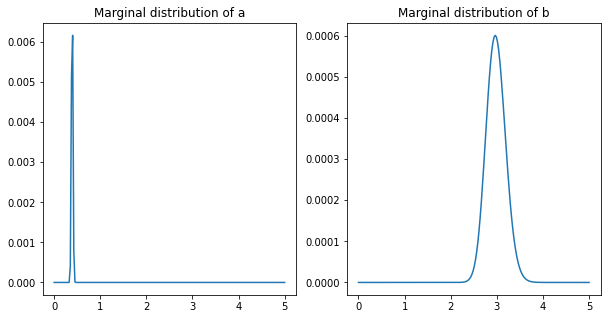

In [52]:
a = np.linspace(0, 5, 200)
b = np.linspace(0, 5, 200)

dist = np.zeros((len(a), len(b)))

for i, a_i in enumerate(a):
    for j, b_j in enumerate(b):
        dist[i, j] = likelihood(a_i, b_j)

marg_a = np.sum(dist, axis=1)
marg_b = np.sum(dist, axis=0)


plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(a, marg_a)
plt.title("Marginal distribution of a")
plt.subplot(122)
plt.plot(b, marg_b)
plt.title("Marginal distribution of b")
plt.show()

4. Priors
   
- Choose a Gaussian prior for $\theta$ and define a posterior distribution.
Calculate the negative log posterior. Calculate the MAP and CM
estimators.
- Do the same as above, but choose a prior distribution that is
uniformly distributed.

Posterior:
$$
    p(\theta|y) = \frac{p(\theta)p(y|\theta)}{p(y)},
$$

$$
    p(\theta) = \frac{1}{\sqrt{2\pi|\Sigma|}}exp(-\frac{1}{2}(\theta-\mu)^T\Sigma^{-11}(\theta-\mu))
$$

$$
    p(y|\theta) = \frac{1}{\sqrt{(2\pi)|\sigma^2\textbf{I}|}}\text{exp}(-\frac{1}{2}\frac{\sum^{11}_{i=1}(y(t_i)-a ~ \text{exp}(-bt_i))^2}{\sigma^2})
$$

So the unnormalized posterior is of the form:

$$
    p(\theta|y) \propto p(\theta)p(y|\theta)
$$

Thus the negative log posterior is of the form:

$$
\begin{split}
    -L_{post}(\theta) &= -log(p(\theta|y)) \\

    &= -log(p(\theta))-log(p(y|\theta)) \\

    &= -log(p(\theta)) + \frac{1}{2}\text{log}(2\pi)+\text{log}(\sigma) + \frac{1}{2\sigma^2} \sum^{11}_{i=1}(y(t_i)-a ~\text{exp}(-bt_i))^2 
\end{split}
$$

Priors and MAP

In [53]:
# Gaussian priors for theta
G_prior_a = lambda a: scipy.stats.norm.pdf(a, loc=2, scale=0.5)
G_prior_b = lambda b: scipy.stats.norm.pdf(b, loc=2, scale=1)

G_prior_theta = lambda theta: [G_prior_a(theta[0]), G_prior_b(theta[1])]
# Uniform priors

U_prior_a = lambda a: scipy.stats.uniform.pdf(a, loc=0.05, scale=4.9)
U_prior_b = lambda b: scipy.stats.uniform.pdf(b, loc=1, scale=3)

U_prior_theta = lambda theta: [U_prior_a(theta[0]), U_prior_b(theta[1])]

neg_log_posterior = lambda theta, prior: -np.log(prior(theta)) + neg_log_likelihood(
    theta
)


def minimize(f, prior, a, b):
    optim = [None, None]
    min_a = np.inf
    min_b = np.inf
    for a_i in a:
        for b_j in b:
            theta = [a_i, b_j]
            val = f(theta, prior)
            val_a = val[0]
            val_b = val[1]
            if val_a < min_a:
                min_a = val_a
                optim[0] = a_i
            if val_b < min_b:
                min_b = val_b
                optim[1] = b_j
    return optim


optim_G = minimize(neg_log_posterior, G_prior_theta, a, b)
optim_U = minimize(neg_log_posterior, U_prior_theta, a, b)


print(
    f"Found maximum a posteriori for Gaussian priors: a = {optim_G[0]:.3f}, b = {optim_G[1]:.3f}"
)

print(
    f"Found maximum a posteriori for Uniform priors: a = {optim_U[0]:.3f}, b = {optim_U[1]:.3f}"
)

Found maximum a posteriori for Gaussian priors: a = 0.402, b = 2.839
Found maximum a posteriori for Uniform priors: a = 0.402, b = 3.040


CM estimation

In [54]:
GCM_fun_a = lambda a, b: a * G_prior_a(a) * likelihood(a, b)
GCM_fun_b = lambda a, b: b * G_prior_b(b) * likelihood(a, b)


Gintegral_a = scipy.integrate.dblquad(GCM_fun_a, -np.inf, np.inf, -np.inf, np.inf)
Gintegral_b = scipy.integrate.dblquad(GCM_fun_b, -np.inf, np.inf, -np.inf, np.inf)

GCM_a = Gintegral_a[0] / evidence[0]
GCM_b = Gintegral_b[0] / evidence[0]

UCM_fun_a = lambda a, b: a * U_prior_a(a) * likelihood(a, b)
UCM_fun_b = lambda a, b: b * U_prior_b(b) * likelihood(a, b)

Uintegral_a = scipy.integrate.dblquad(UCM_fun_a, -np.inf, np.inf, -np.inf, np.inf)
Uintegral_b = scipy.integrate.dblquad(UCM_fun_b, -np.inf, np.inf, -np.inf, np.inf)

UCM_a = Uintegral_a[0] / evidence[0]
UCM_b = Uintegral_b[0] / evidence[0]

print(f"CM estimator values with Gaussian priors for a and b: {GCM_a, GCM_b}")

print(f"CM estimator values with Uniform priors for a and b: {UCM_a, UCM_b}")

CM estimator values with Gaussian priors for a and b: (0.0001684630959802797, 0.7239043147815994)
CM estimator values with Uniform priors for a and b: (0.05778078883340787, 0.9940053250883235)


5. Visualization

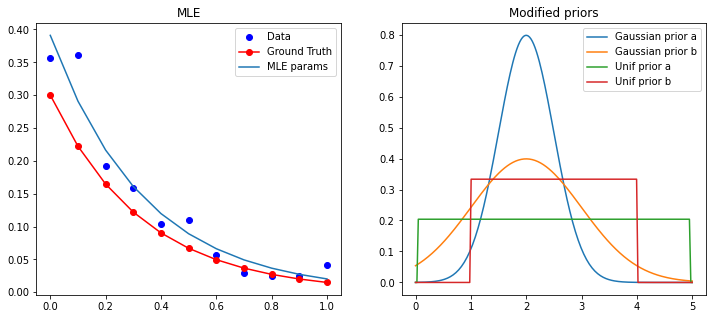

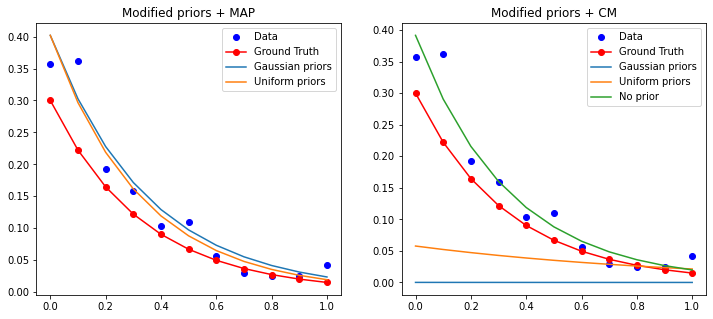

In [55]:
exp_decay = lambda a, b: a * np.exp(-b * t)


plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(t, y_t, "bo", t, gt, "r-o")
plt.plot(t, exp_decay(optim[0], optim[1]))
plt.legend(["Data", "Ground Truth", "MLE params"])
plt.title("MLE")


plt.subplot(122)
plt.plot(a, G_prior_a(a), b, G_prior_b(b), a, U_prior_a(a), b, U_prior_b(b))
plt.legend(["Gaussian prior a", "Gaussian prior b", "Unif prior a", "Unif prior b"])
plt.title("Modified priors")
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(t, y_t, "bo", t, gt, "r-o")
plt.plot(t, exp_decay(optim_G[0], optim_G[1]), t, exp_decay(optim_U[0], optim_U[1]))
plt.legend(["Data", "Ground Truth", "Gaussian priors", "Uniform priors"])
plt.title("Modified priors + MAP")


plt.subplot(122)
plt.plot(t, y_t, "bo", t, gt, "r-o")
plt.plot(t, exp_decay(GCM_a, GCM_b), t, exp_decay(UCM_a, UCM_b), t, exp_decay(integral_a[0]/evidence[0], integral_b[0]/evidence[0]))
plt.legend(["Data", "Ground Truth", "Gaussian priors", "Uniform priors", "No prior"])
plt.title("Modified priors + CM")
plt.show()